# Project 2: Time Series Analysis on Germany's GDP & Birth Rate

In [13]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet

# Germany's GDP Analysis and Forecast GDP

In [15]:
# Read the 'World Bank GDP' dataset
df = pd.read_csv('World_Bank_GDP.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,21853.44999,19681.64503,20290.78042,23705.90722,30819.99349,34460.543,...,68156.3861,62515.31483,56708.9612,49876.71238,53934.15437,57206.99067,54941.06572,51722.069,60444.50236,64491.42989
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Austria,AUT,24625.60072,24558.76368,26527.59309,32294.04886,36889.23351,38417.45779,...,50731.12725,51786.37717,44195.81759,45307.58786,47429.15846,51466.55656,50070.40335,48809.22688,53637.70571,52131.44666
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Belgium,BEL,23098.88651,23015.07126,25006.1914,30655.20927,35429.40779,36809.70134,...,46757.95186,47764.07151,41008.29672,42012.62272,44198.48239,47544.98115,46641.71166,45517.90382,51268.38804,49582.82536
3,GDP per capita (current US$),NY.GDP.PCAP.CD,Brazil,BRA,3726.81142,3142.235528,2824.715396,3056.64968,3623.223905,4773.26848,...,12258.56485,12071.40465,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931,6923.700197,7696.785531,8917.673898
4,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [16]:
df.describe()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
unique,1,1,48,48,45,45,45,45,45,45,...,46,46,46,47,47,47,47,47,47,44
top,GDP per capita (current US$),NY.GDP.PCAP.CD,Australia,AUS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,48,48,1,1,4,4,4,4,4,4,...,3,3,3,2,2,2,2,2,2,5


In [17]:
# Drop rows where Country Code is not GERMANY (GER)
df = df.drop(df[df['Country Code'] != 'DEU'].index)

In [18]:
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,GDP per capita (current US$),NY.GDP.PCAP.CD,Germany,DEU,23694.76048,23628.32721,25197.2656,30310.3576,34106.65812,34520.23965,...,46298.92292,48023.86998,41103.25644,42136.12079,44652.58917,47939.27829,46793.68676,46772.82535,51203.55447,48432.45587


In [19]:
# Drop columns that are not needed
df = df.drop(['Series Name', 'Series Code', 'Country Name','Country Name','Country Code'], axis=1)

In [20]:
# Rename the the fist column of dataframe to GDP
df = df.rename(columns={'Series Name': 'GDP' })

# Read the GDP dataframe
df.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,23694.76048,23628.32721,25197.2656,30310.3576,34106.65812,34520.23965,36353.88033,41640.08087,45612.71062,41650.36783,...,46298.92292,48023.86998,41103.25644,42136.12079,44652.58917,47939.27829,46793.68676,46772.82535,51203.55447,48432.45587


In [21]:
# Melt the dataframe
df = df.reset_index().rename(columns={'index':'id'})
df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

In [22]:
'''
df = df.reset_index().rename(columns={'index':'id'})

df = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')
df['year'] = df['year'].str.extract('(\d+)', expand=False).astype(int)

#pivot_table = df.pivot_table(index='id', columns='year', values='value')
#print(pivot_table)
'''

"\ndf = df.reset_index().rename(columns={'index':'id'})\n\ndf = pd.melt(df, id_vars=['id'], var_name='year', value_name='GDP')\ndf['year'] = df['year'].str.extract('(\\d+)', expand=False).astype(int)\n\n#pivot_table = df.pivot_table(index='id', columns='year', values='value')\n#print(pivot_table)\n"

In [23]:
df.head(5)

,id,year,GDP
0,14,2000,23694.76048
1,14,2001,23628.32721
2,14,2002,25197.2656
3,14,2003,30310.3576
4,14,2004,34106.65812


In [24]:
# Change the 'year' column to read as a 'date'
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.strftime('%Y-%m-%d')

In [25]:
# Drop the column for 'id'
df = df.drop(['id'], axis=1)

In [26]:
df.head(30)

,year,GDP
0,2000-01-01,23694.76048
1,2001-01-01,23628.32721
2,2002-01-01,25197.2656
3,2003-01-01,30310.3576
4,2004-01-01,34106.65812
5,2005-01-01,34520.23965
6,2006-01-01,36353.88033
7,2007-01-01,41640.08087
8,2008-01-01,45612.71062
9,2009-01-01,41650.36783


In [27]:
# Swap the columns
df = df[['GDP', 'year']]

In [28]:
df.head()

,GDP,year
0,23694.76048,2000-01-01
1,23628.32721,2001-01-01
2,25197.2656,2002-01-01
3,30310.3576,2003-01-01
4,34106.65812,2004-01-01


In [29]:
# Impute data for missing values
#df['GDP']=df['GDP'].fillna(method='ffill')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GDP     23 non-null     object
 1   year    23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [31]:
# Chagne the data type to float and date
df['GDP'] = df['GDP'].astype(float)
df['year'] = pd.to_datetime(df['year'])

In [32]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df = df[["GDP","year"]]
df.rename(columns={"year": "ds","GDP":"y"}, inplace=True)

In [33]:
df.head()

,y,ds
0,23694.76048,2000-01-01
1,23628.32721,2001-01-01
2,25197.26560,2002-01-01
3,30310.35760,2003-01-01
4,34106.65812,2004-01-01


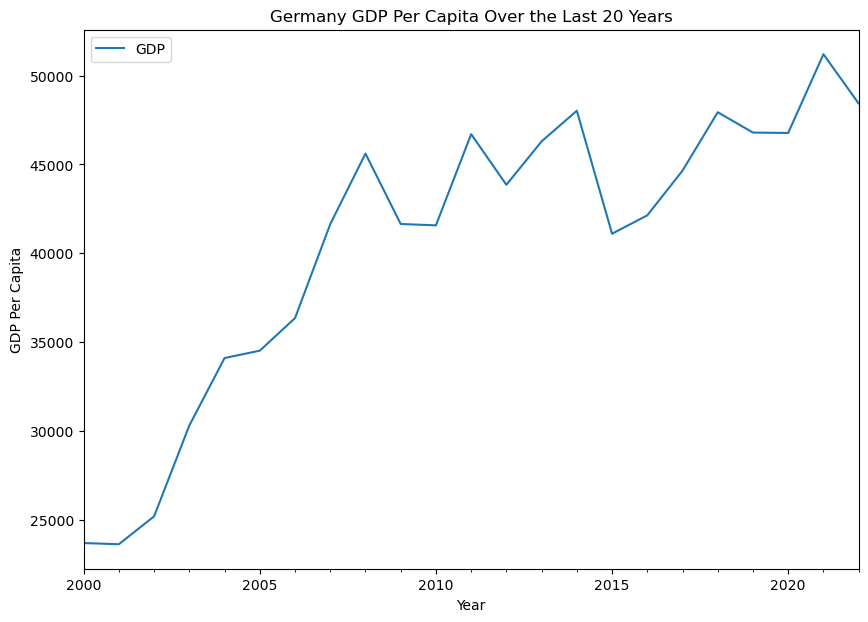

In [34]:
# 1. Plot the date for sales over time
ax = df.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('GDP Per Capita')
ax.set_xlabel('Year')
ax.legend(['GDP'])

plt.title("Germany GDP Per Capita Over the Last 20 Years")
plt.show()

In [35]:
# 2. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train = df[df['ds'] < '2021-01-01']
df_test = df[df['ds'] >= '2021-01-01']

In [36]:
df_test.tail(10)

,y,ds
21,51203.55447,2021-01-01
22,48432.45587,2022-01-01


In [37]:
# 3. Use the training set to build a predictive model for the annual GDP for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables

m = NeuralProphet(yearly_seasonality=True) 

#m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01) 

#yearly_seasonality=True
# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train, freq="Y")
metrics_test = m.test(df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.35E-02, min: 7.27E-01


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.41E-01, min: 5.92E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.78E-02
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 218.24it/s, SmoothL1Loss=0.0
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE     RMSE
1         0.003 1956.043 1969.923


INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 225.85it/s, SmoothL1Loss=0.0
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils

Text(0.5, 1.0, 'Germany GDP Forecast')

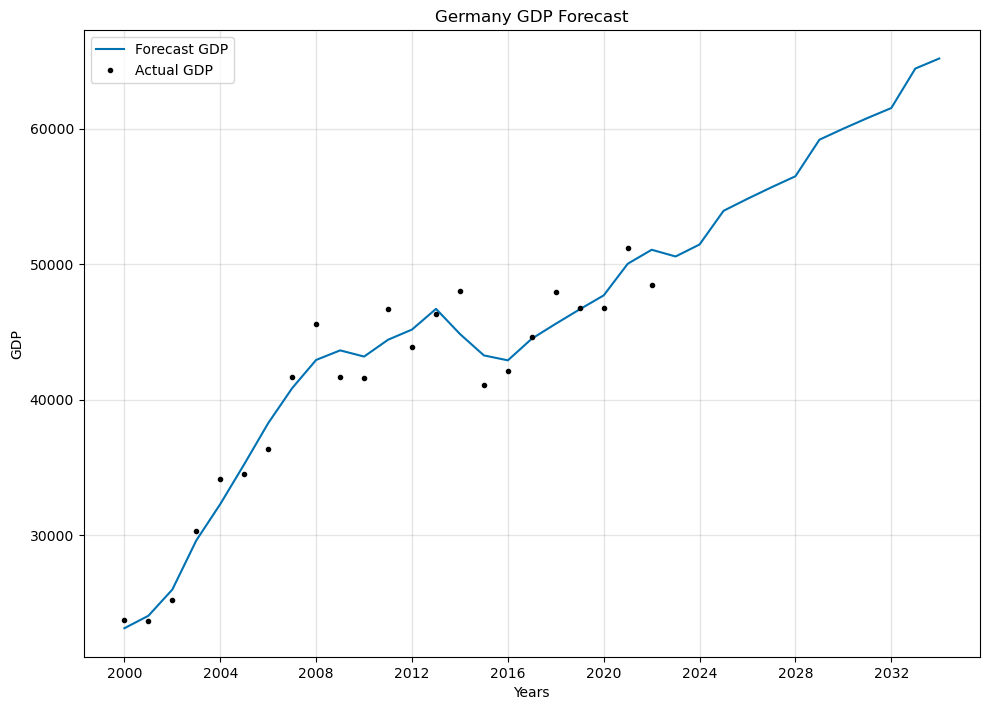

In [157]:
# 4. Use the model to predict the annual GDP on the last year of data 2021
m = NeuralProphet(trend_reg=0, seasonality_reg = 0.01, seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train, freq="Y")
future = m.make_future_dataframe(df, periods=12, n_historic_predictions=96)
forecast = m.predict(future)

#fig.legend(['Forecast GDP','Actual GDP'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="GDP", ax=ax)
ax.legend(['Forecast GDP','Actual GDP'])
plt.title('Germany GDP Forecast')


In [39]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.002001,1309.844779,1535.219697,0.0
991,0.002001,1309.842727,1515.996623,0.0
992,0.002001,1309.815005,1518.959787,0.0
993,0.002001,1309.798642,1538.039080,0.0
994,0.002001,1309.784691,1538.050235,0.0
995,0.002001,1309.781424,1525.601958,0.0
996,0.002001,1309.780308,1536.713954,0.0
997,0.002001,1309.779582,1519.642840,0.0
998,0.002001,1309.778457,1507.545227,0.0
999,0.002001,1309.777332,1532.942883,0.0


In [40]:
# Make future GDP forecast dataframe
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=96)
forecast = m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,23694.76048,23302.763672,-391.996808,23362.585938,0.225115
1,2001-01-01,23628.32721,24089.648438,461.321228,23988.236328,0.281774
2,2002-01-01,25197.26560,25963.445312,766.179713,25477.193359,0.263000
3,2003-01-01,30310.35760,29651.132812,-659.224787,28469.386719,0.244109
4,2004-01-01,34106.65812,32332.640625,-1774.017495,30733.222656,0.225115
5,2005-01-01,34520.23965,35357.886719,837.647069,32779.359375,0.281774
6,2006-01-01,36353.88033,38370.437500,2016.557170,35300.625000,0.263000
7,2007-01-01,41640.08087,41042.328125,-597.752745,37625.492188,0.244109
8,2008-01-01,45612.71062,43337.109375,-2275.601245,39715.621094,0.225115
9,2009-01-01,41650.36783,43609.355469,1958.987639,39216.894531,0.281774


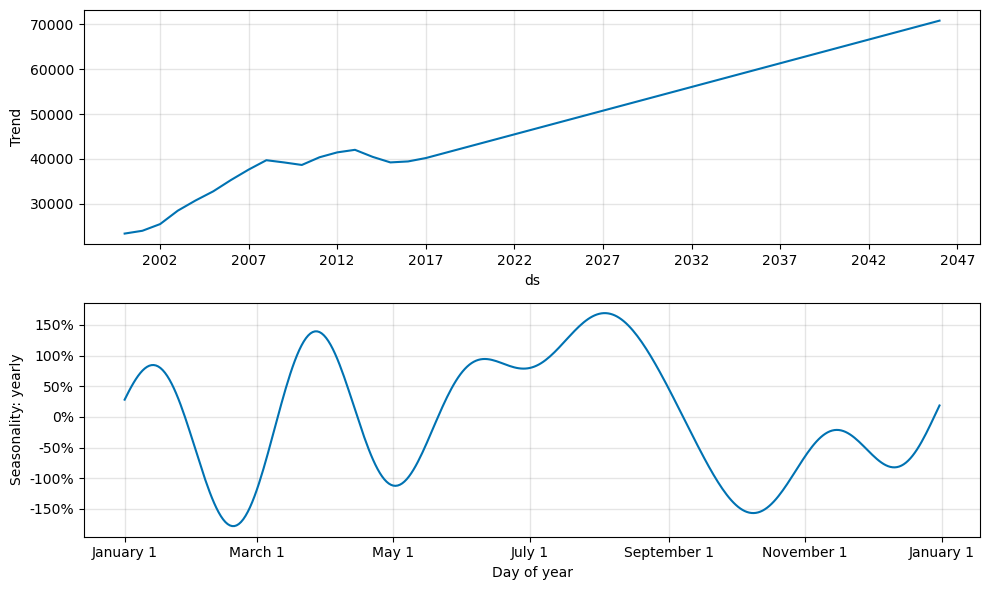

In [41]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast)

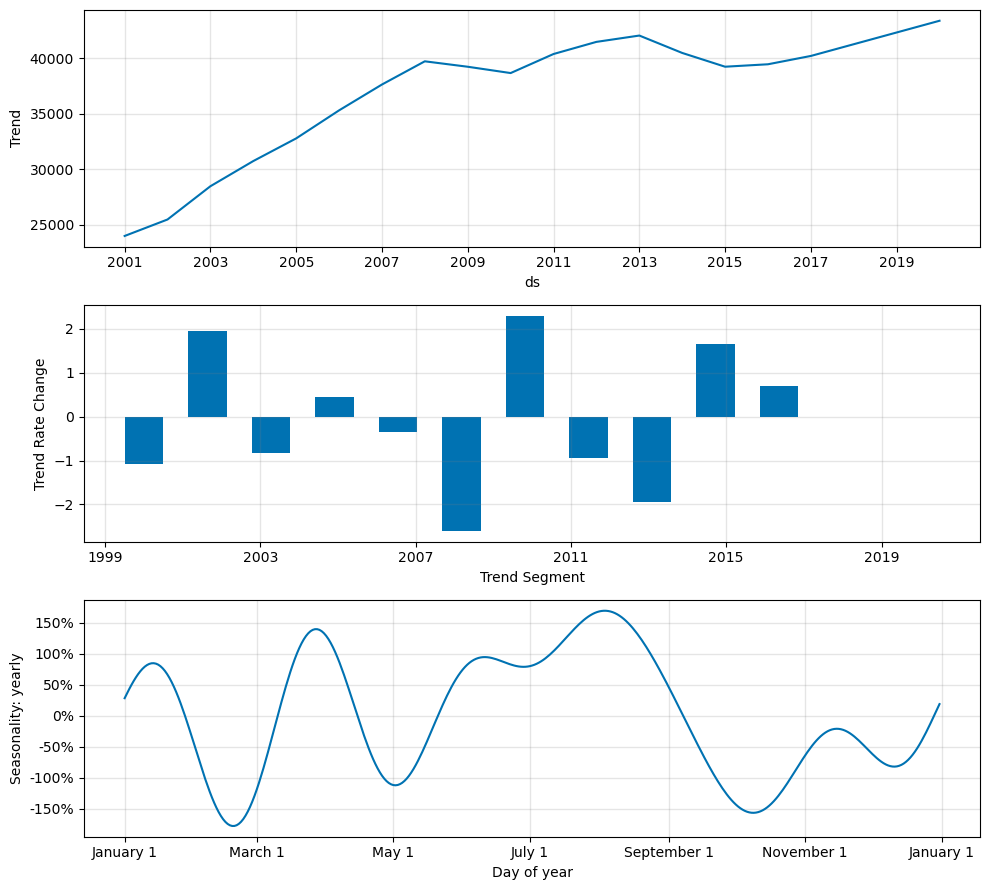

In [42]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [43]:
# 5. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.003283,1956.042969,1969.922607


In [174]:
# Make a dataframe for 'forecast dataset'
df_GDP = forecast

# Fill the NaN with the value before the last
df_GDP[['y','residual1']]=df_GDP[['y','residual1']].fillna(method='ffill')

In [177]:
df_GDP.tail()

,ds,y,yhat1,residual1,trend,season_yearly
30,2029-12-31,48432.45587,59708.160156,2828.45038,48799.878906,0.433358
31,2030-12-31,48432.45587,60333.171875,2828.45038,49695.082031,0.408109
32,2031-12-31,48432.45587,60913.753906,2828.45038,50590.281250,0.382890
33,2032-12-31,48432.45587,64265.136719,2828.45038,51487.937500,0.458628
34,2033-12-31,48432.45587,64844.253906,2828.45038,52383.140625,0.433358


In [175]:
# Save the GDP forecast/prediction as a csv file
path = "/Users/philshan/Documents/GitHub/DSC680/GER_GDP_Forecast.csv"

df_GDP.to_csv(path, index=False)

In [106]:
# Read the 'World Bank GDP' dataset
df_birth = pd.read_csv('World_Bank_Birthrate.csv')
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Australia,AUS,1.756,1.739,1.756,1.748,1.768,1.807,...,1.855,1.826,1.814,1.752,1.741,1.74,1.657,1.581,1.7,..
1,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Austria,AUT,1.36,1.33,1.39,1.38,1.42,1.41,...,1.44,1.46,1.49,1.53,1.52,1.47,1.46,1.44,1.48,..
2,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Belgium,BEL,1.67,1.67,1.65,1.67,1.72,1.76,...,1.76,1.74,1.7,1.68,1.65,1.62,1.6,1.55,1.6,..
3,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Brazil,BRA,2.255,2.183,2.103,2.023,2.002,1.974,...,1.748,1.767,1.777,1.709,1.736,1.749,1.703,1.649,1.641,..
4,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,British Virgin Islands,VGB,1.866,1.505,1.24,1.306,1.505,1.341,...,1.08,1.237,1.186,0.987,0.872,0.917,0.948,0.976,1.005,..


In [107]:
# Drop rows where Country Code is not GERMANY (DEU)
df_birth = df_birth.drop(df_birth[df_birth['Country Code'] != 'DEU'].index)

In [108]:
df_birth.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Germany,DEU,1.38,1.35,1.34,1.34,1.36,1.34,...,1.42,1.47,1.5,1.6,1.57,1.57,1.54,1.53,1.58,..


In [109]:
# Drop columns that are not needed
df_birth = df_birth.drop(['Series Name', 'Series Code', 'Country Name','Country Code'], axis=1)

In [110]:
# Rename the the fist column of dataframe to GDP
df_birth = df_birth.rename(columns={'Series Name': 'Birth_Rate' })

In [111]:
# Read the GDP dataframe
df_birth.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
14,1.38,1.35,1.34,1.34,1.36,1.34,1.33,1.37,1.38,1.36,...,1.42,1.47,1.5,1.6,1.57,1.57,1.54,1.53,1.58,..


In [112]:
# Melt the dataframe
df_birth = df_birth.reset_index().rename(columns={'index':'id'})
df_birth = pd.melt(df_birth, id_vars=['id'], var_name='year', value_name='Birth')
df_birth['year'] = df_birth['year'].str.extract('(\d+)', expand=False).astype(int)

In [113]:
# Check the new dataframe for birthrate
df_birth.head(25)

,id,year,Birth
0,14,2000,1.38
1,14,2001,1.35
2,14,2002,1.34
3,14,2003,1.34
4,14,2004,1.36
5,14,2005,1.34
6,14,2006,1.33
7,14,2007,1.37
8,14,2008,1.38
9,14,2009,1.36


In [114]:
# Change the 'year' column to read as a 'date'
df_birth['year'] = pd.to_datetime(df_birth['year'], format='%Y')
df_birth['year'] = df_birth['year'].dt.strftime('%Y-%m-%d')

In [115]:
# Drop the column for 'id'
df_birth = df_birth.drop(['id'], axis=1)

In [116]:
df_birth.tail(5)

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,..


In [117]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    23 non-null     object
 1   Birth   23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [118]:
df_birth['Birth'].str.replace(r'\..','0').astype(float)
df_birth.tail()

WARNING - (py.warnings._showwarnmsg) - /var/folders/dq/pk6vhlb94kl10cjryr47z9sw0000gn/T/ipykernel_76930/734646817.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_birth['Birth'].str.replace(r'\..','0').astype(float)



,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,..


In [119]:
# Chagne the data type to float and date
df_birth['Birth'] = pd.to_numeric(df_birth['Birth'], errors='coerce')
df_birth['year'] = pd.to_datetime(df_birth['year'])

In [120]:
df_birth.tail()

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,NaN


In [121]:
# Fill the NaN with the value before the last
df_birth['Birth']=df_birth['Birth'].fillna(method='ffill')

In [122]:
df_birth.tail()

,year,Birth
18,2018-01-01,1.57
19,2019-01-01,1.54
20,2020-01-01,1.53
21,2021-01-01,1.58
22,2022-01-01,1.58


In [123]:
df_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    23 non-null     datetime64[ns]
 1   Birth   23 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 496.0 bytes


In [124]:
# Rename the dataframe with date and sales as 'ds' and 'y', respectively
df_birth = df_birth[["Birth","year"]]
df_birth.rename(columns={"year": "ds","Birth":"y"}, inplace=True)

In [125]:
df_birth.head()

,y,ds
0,1.38,2000-01-01
1,1.35,2001-01-01
2,1.34,2002-01-01
3,1.34,2003-01-01
4,1.36,2004-01-01


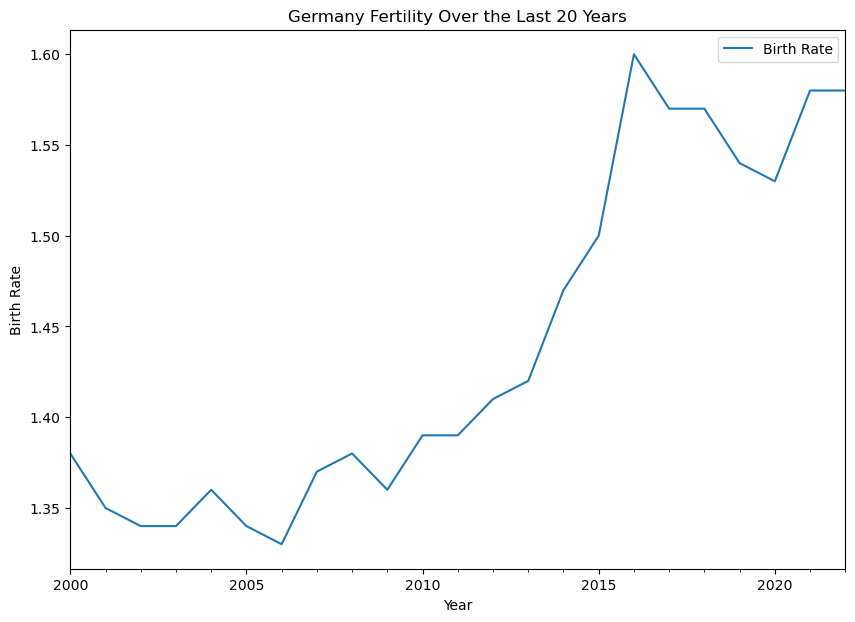

In [126]:
# 1. Plot the date for sales over time
ax = df_birth.set_index('ds').plot(figsize=(10, 7))
ax.set_ylabel('Birth Rate')
ax.set_xlabel('Year')
ax.legend(['Birth Rate'])

plt.title("Germany Fertility Over the Last 20 Years")
plt.show()

In [127]:
# 2a. Split the data into a training and test set.  Use the last year of data (Jan 2022) of data as 
# your test set and the rest as your training set. 
df_train1 = df_birth[df_birth['ds'] < '2021-01-01']
df_test1 = df_birth[df_birth['ds'] >= '2021-01-01']

In [128]:
df_test1.head(30)

,y,ds
21,1.58,2021-01-01
22,1.58,2022-01-01


In [129]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 21 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       2 non-null      float64       
 1   ds      2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.0 bytes


In [139]:
# 3a. Use the training set to build a predictive model for the annual Birthrate for South Korea 

# Intialize the predictive model with Neural Prophet, using default variables
m = NeuralProphet(
yearly_seasonality=True)  

# Fit the train data and the test data from #2 to the predictive model built w/ Neural Propet
metrics_train = m.fit(df=df_train1, freq="Y")
metrics_test = m.test(df=df_test1)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.58E+01, min: 5.92E-01


  0%|          | 0/102 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.81E-02, min: 5.92E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.02E-01
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 230.14it/s, SmoothL1Loss=0.0
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 100.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.111  0.113  0.113


INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
Epoch[1000/1000]: 100%|█| 1000/1000 [00:04<00:00, 232.28it/s, SmoothL1Loss=0.0
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._ma

Text(0.5, 1.0, 'Germany Birth Rate Forecast')

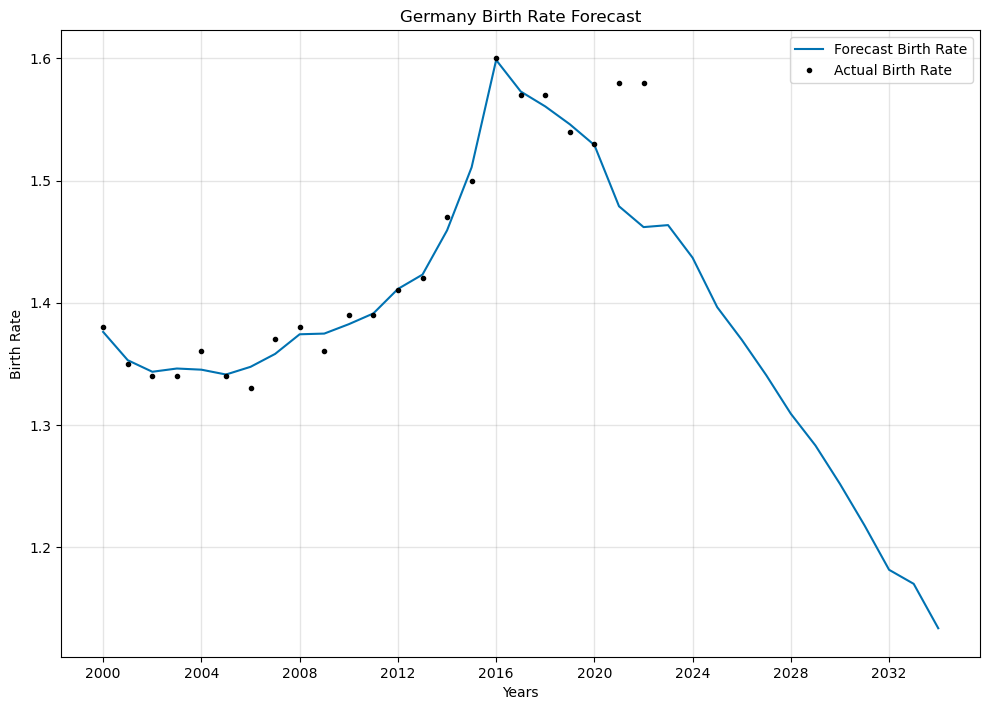

In [145]:
# 4a. Use the model to predict the annual Birth Rate on the last year of data 2021
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
metrics_train2 = m.fit(df=df_train1, freq="Y")
future = m.make_future_dataframe(df_birth, periods=12, n_historic_predictions=48)
forecast = m.predict(future)

#fig.legend(['Forecast Birthrate','Actual Birthrate'])
fig, ax = plt.subplots(figsize=(10,7))
m.plot(forecast, xlabel="Years", ylabel="Birth Rate", ax=ax)
ax.legend(['Forecast Birth Rate','Actual Birth Rate'])
plt.title('Germany Birth Rate Forecast')

In [132]:
metrics_train.tail(10)

,SmoothL1Loss,MAE,RMSE,RegLoss
990,0.000364,0.005397,0.006463,0.0
991,0.000364,0.005397,0.006420,0.0
992,0.000364,0.005398,0.006278,0.0
993,0.000364,0.005398,0.006325,0.0
994,0.000364,0.005398,0.006392,0.0
995,0.000364,0.005398,0.006302,0.0
996,0.000364,0.005398,0.006469,0.0
997,0.000364,0.005398,0.006429,0.0
998,0.000364,0.005398,0.006455,0.0
999,0.000364,0.005398,0.006474,0.0


In [133]:
# Make future birthrate forecast dataframe
future1 = m.make_future_dataframe(df_birth, periods=24, n_historic_predictions=96)
forecast1 = m.predict(future1)
forecast1

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 96 historic forecasts, reduced to 23.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.745% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/li

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.38,1.358765,-0.021235,1.358380,0.013563
1,2001-01-01,1.35,1.351877,0.001877,1.354582,-0.110031
2,2002-01-01,1.34,1.351145,0.011145,1.352715,-0.069112
3,2003-01-01,1.34,1.353511,0.013511,1.354186,-0.027910
4,2004-01-01,1.36,1.350595,-0.009405,1.350320,0.013563
5,2005-01-01,1.34,1.343609,0.003609,1.345292,-0.110031
6,2006-01-01,1.33,1.347299,0.017299,1.348584,-0.069112
7,2007-01-01,1.37,1.355825,-0.014175,1.356566,-0.027910
8,2008-01-01,1.38,1.370700,-0.009300,1.370156,0.013563
9,2009-01-01,1.36,1.371410,0.011410,1.376529,-0.110031


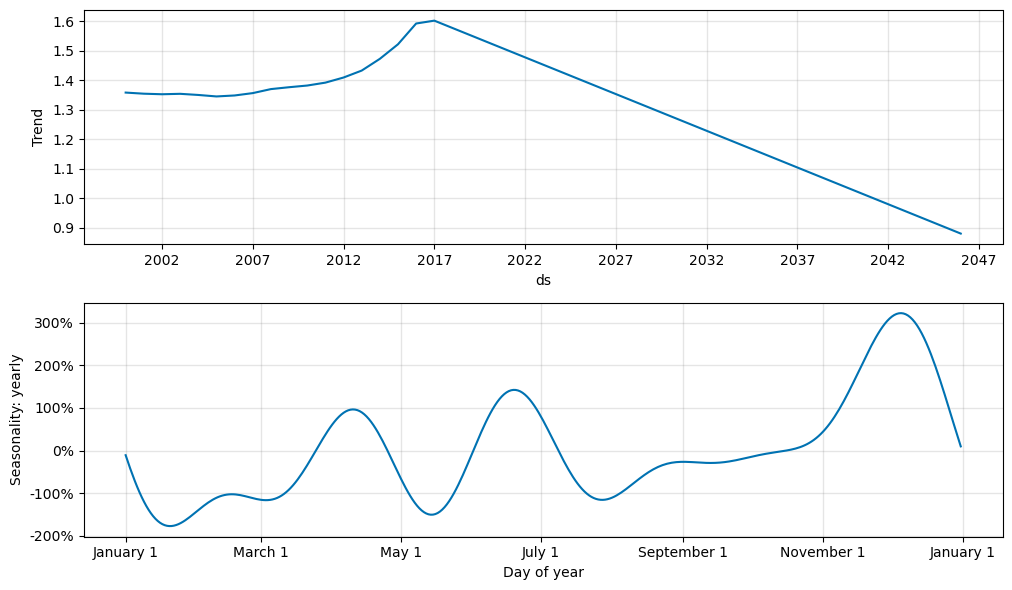

In [134]:
# 4a. Show the seasonality as a percent of the trend
fig_param = m.plot_components(forecast1)

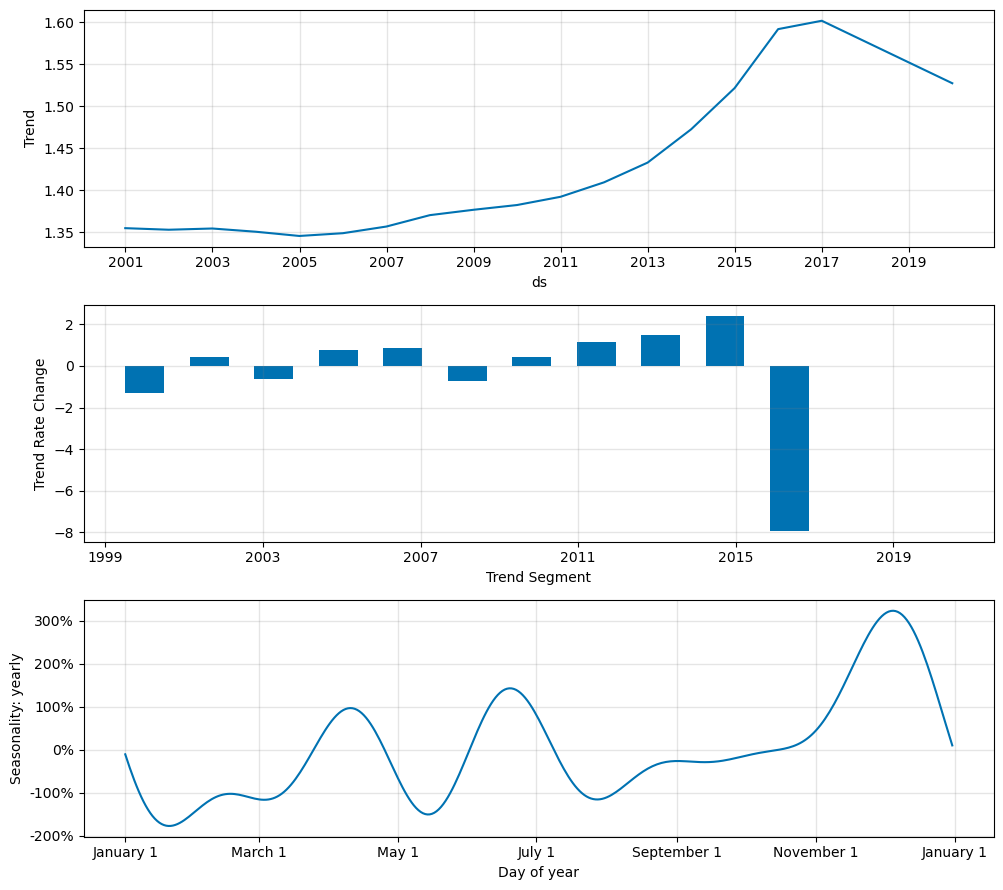

In [135]:
# Visualize the model parameters
fig_model = m.plot_parameters()

In [136]:
# 5a. Report the RMSE of the model predictions on the test set
metrics_test

,SmoothL1Loss,MAE,RMSE
0,0.113162,0.113918,0.114177


In [172]:
# Make a dataframe for 'forecast1 dataset'
df_birth1 = forecast1

# Fill the NaN with the value before the last
df_birth1[['y','residual1']]=df_birth1[['y','residual1']].fillna(method='ffill')

In [178]:
# Check the updated dataframe for the predicted data for birth rate
df_birth1.tail()

,ds,y,yhat1,residual1,trend,season_yearly
42,2041-12-31,1.58,0.946394,-0.112566,0.980400,0.097271
43,2042-12-31,1.58,0.903323,-0.112566,0.955551,0.139480
44,2043-12-31,1.58,0.858068,-0.112566,0.930703,0.181906
45,2044-12-31,1.58,0.882330,-0.112566,0.905787,0.055295
46,2045-12-31,1.58,0.837258,-0.112566,0.880938,0.097271


In [137]:
# Save the birthrate forecast/prediction as a csv file

path = "/Users/philshan/Documents/GitHub/DSC680/GER_Birthrate_Forecast.csv"

df_birth1.to_csv(path, index=False)

In [179]:
'''
# save predictions to a csv in google drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/GDP_forecast.csv'
'''

"\n# save predictions to a csv in google drive\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/GDP_forecast.csv'\n"

In [130]:
# Read the new prediction 'World Bank GDP' dataset
gdp_df = pd.read_csv('ROK_GDP_Forecast.csv')
gdp_df.head(100)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,12256.99357,11242.615234,-1014.378336,10554.338867,-0.683554
1,2001-01-01,11561.24837,12425.050781,863.802411,14134.623047,-0.664331
2,2002-01-01,13165.06574,13735.633789,570.568049,18166.619141,-0.670816
3,2003-01-01,14672.85747,15253.589844,580.732374,23000.605469,-0.677225
4,2004-01-01,16496.12009,16888.998047,392.877957,28397.453125,-0.683554
5,2005-01-01,19402.50326,19060.656250,-341.847010,33902.914062,-0.664331
6,2006-01-01,21743.47709,20346.585938,-1396.891153,38249.437500,-0.670816
7,2007-01-01,24086.41143,21117.722656,-2968.688774,41168.453125,-0.677225
8,2008-01-01,21350.42863,21314.144531,-36.284099,42381.343750,-0.683554
9,2009-01-01,19143.85161,22594.238281,3450.386671,44429.890625,-0.664331


In [131]:
# Change the columns heads for the new GDP dataset
gdp_df.rename({'y': 'GDP','yhat1':'pred_GDP'}, axis= "columns", inplace = True)

In [132]:
# Check the new headers for the new GDP dataset 
gdp_df.head()

,ds,GDP,pred_GDP,residual1,trend,season_yearly
0,2000-01-01,12256.99357,11242.615234,-1014.378336,10554.338867,-0.683554
1,2001-01-01,11561.24837,12425.050781,863.802411,14134.623047,-0.664331
2,2002-01-01,13165.06574,13735.633789,570.568049,18166.619141,-0.670816
3,2003-01-01,14672.85747,15253.589844,580.732374,23000.605469,-0.677225
4,2004-01-01,16496.12009,16888.998047,392.877957,28397.453125,-0.683554


In [133]:
# Read the new prediction 'World Bank Birthrate' dataset
br_df = pd.read_csv('ROK_Birthrate_Forecast.csv')
br_df.head(120)

,ds,y,yhat1,residual1,trend,season_yearly
0,2000-01-01,1.480,1.493243,0.013243,1.090593,1.587780
1,2001-01-01,1.309,1.274030,-0.034970,1.040163,1.151133
2,2002-01-01,1.178,1.212569,0.034569,1.000495,1.297122
3,2003-01-01,1.191,1.184574,-0.006426,0.979292,1.442689
4,2004-01-01,1.164,1.158129,-0.005871,0.961094,1.587780
5,2005-01-01,1.085,1.077300,-0.007700,0.948709,1.151133
6,2006-01-01,1.132,1.171282,0.039282,0.982522,1.297122
7,2007-01-01,1.259,1.219350,-0.039650,0.993528,1.442689
8,2008-01-01,1.192,1.200003,0.008003,0.977276,1.587780
9,2009-01-01,1.149,1.160118,0.011118,0.987208,1.151133


In [134]:
# Change the columns heads for the new birthrate dataset
br_df.rename({'y': 'birth_rate','yhat1':'pred_birth_rate'}, axis= "columns", inplace = True)
br_df.head()

,ds,birth_rate,pred_birth_rate,residual1,trend,season_yearly
0,2000-01-01,1.480,1.493243,0.013243,1.090593,1.587780
1,2001-01-01,1.309,1.274030,-0.034970,1.040163,1.151133
2,2002-01-01,1.178,1.212569,0.034569,1.000495,1.297122
3,2003-01-01,1.191,1.184574,-0.006426,0.979292,1.442689
4,2004-01-01,1.164,1.158129,-0.005871,0.961094,1.587780


In [135]:
# Merge the new GDP ("gdp_df") dataset with the new Birthrate ()"br_df) dataset
new_df = pd.merge(gdp_df, br_df, on='ds')

In [151]:
# Check the new 'merged' dataset called 'new_df'
new_df.head(120)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,12256.99357,11242.615234,-1014.378336,10554.338867,-0.683554,1.480,1.493243,0.013243,1.090593,1.587780
1,2001-01-01,11561.24837,12425.050781,863.802411,14134.623047,-0.664331,1.309,1.274030,-0.034970,1.040163,1.151133
2,2002-01-01,13165.06574,13735.633789,570.568049,18166.619141,-0.670816,1.178,1.212569,0.034569,1.000495,1.297122
3,2003-01-01,14672.85747,15253.589844,580.732374,23000.605469,-0.677225,1.191,1.184574,-0.006426,0.979292,1.442689
4,2004-01-01,16496.12009,16888.998047,392.877957,28397.453125,-0.683554,1.164,1.158129,-0.005871,0.961094,1.587780
5,2005-01-01,19402.50326,19060.656250,-341.847010,33902.914062,-0.664331,1.085,1.077300,-0.007700,0.948709,1.151133
6,2006-01-01,21743.47709,20346.585938,-1396.891153,38249.437500,-0.670816,1.132,1.171282,0.039282,0.982522,1.297122
7,2007-01-01,24086.41143,21117.722656,-2968.688774,41168.453125,-0.677225,1.259,1.219350,-0.039650,0.993528,1.442689
8,2008-01-01,21350.42863,21314.144531,-36.284099,42381.343750,-0.683554,1.192,1.200003,0.008003,0.977276,1.587780
9,2009-01-01,19143.85161,22594.238281,3450.386671,44429.890625,-0.664331,1.149,1.160118,0.011118,0.987208,1.151133


In [137]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              23 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      23 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       23 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      23 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [139]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
#sns.lmplot(x='GDP', y='birth', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

In [141]:
new_df.head(5)

,ds,GDP,pred_GDP,residual1_x,trend_x,season_yearly_x,birth_rate,pred_birth_rate,residual1_y,trend_y,season_yearly_y
0,2000-01-01,12256.99357,11242.615234,-1014.378336,10554.338867,-0.683554,1.480,1.493243,0.013243,1.090593,1.587780
1,2001-01-01,11561.24837,12425.050781,863.802411,14134.623047,-0.664331,1.309,1.274030,-0.034970,1.040163,1.151133
2,2002-01-01,13165.06574,13735.633789,570.568049,18166.619141,-0.670816,1.178,1.212569,0.034569,1.000495,1.297122
3,2003-01-01,14672.85747,15253.589844,580.732374,23000.605469,-0.677225,1.191,1.184574,-0.006426,0.979292,1.442689
4,2004-01-01,16496.12009,16888.998047,392.877957,28397.453125,-0.683554,1.164,1.158129,-0.005871,0.961094,1.587780


In [142]:
#new_df['ds'] = pd.to_datetime(new_df['ds'])

In [143]:
#new_df['ds'] = pd.to_datetime(new_df['ds']).astype(int) / 10**9

In [144]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ds               47 non-null     object 
 1   GDP              23 non-null     float64
 2   pred_GDP         47 non-null     float64
 3   residual1_x      23 non-null     float64
 4   trend_x          47 non-null     float64
 5   season_yearly_x  47 non-null     float64
 6   birth_rate       23 non-null     float64
 7   pred_birth_rate  47 non-null     float64
 8   residual1_y      23 non-null     float64
 9   trend_y          47 non-null     float64
 10  season_yearly_y  47 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.4+ KB


In [145]:
'''
from sklearn.impute import KNNImputer

# create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# perform KNN imputation on the dataframe
#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])
imputed_df = imputer.fit_transform(new_df)
'''

"\nfrom sklearn.impute import KNNImputer\n\n# create an instance of the KNNImputer class\nimputer = KNNImputer(n_neighbors=5)\n\n# perform KNN imputation on the dataframe\n#new_df[['GDP','residual1_x','birth','residual1_y']] = imputer.fit_transform(new_df[['GDP','residual1_x','birth','residual1_y']])\nimputed_df = imputer.fit_transform(new_df)\n"

In [146]:
#new_df.head(100)

In [147]:
'''
new_df = pd.DataFrame(imputed_df)
new_df.head(100)
'''

'\nnew_df = pd.DataFrame(imputed_df)\nnew_df.head(100)\n'

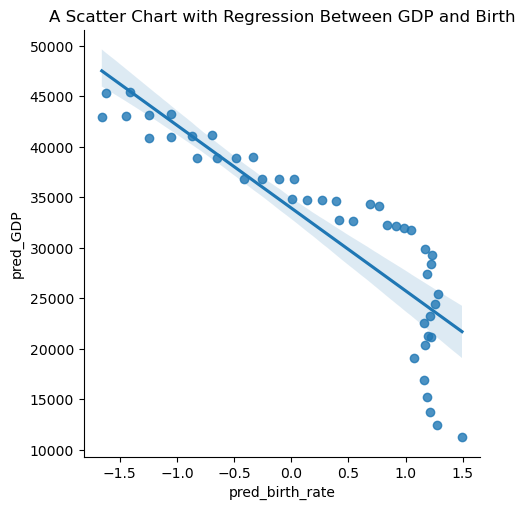

In [148]:
# Figure 1-Scatter plot with regression betweein GDP_Predict and Birthrate_Predict
sns.lmplot(x='pred_birth_rate', y='pred_GDP', data=new_df).set(title='A Scatter Chart with Regression Between GDP and Birth')

Text(0.5, 1.0, 'Correlation Heatmap Between GDP and Birthrate')

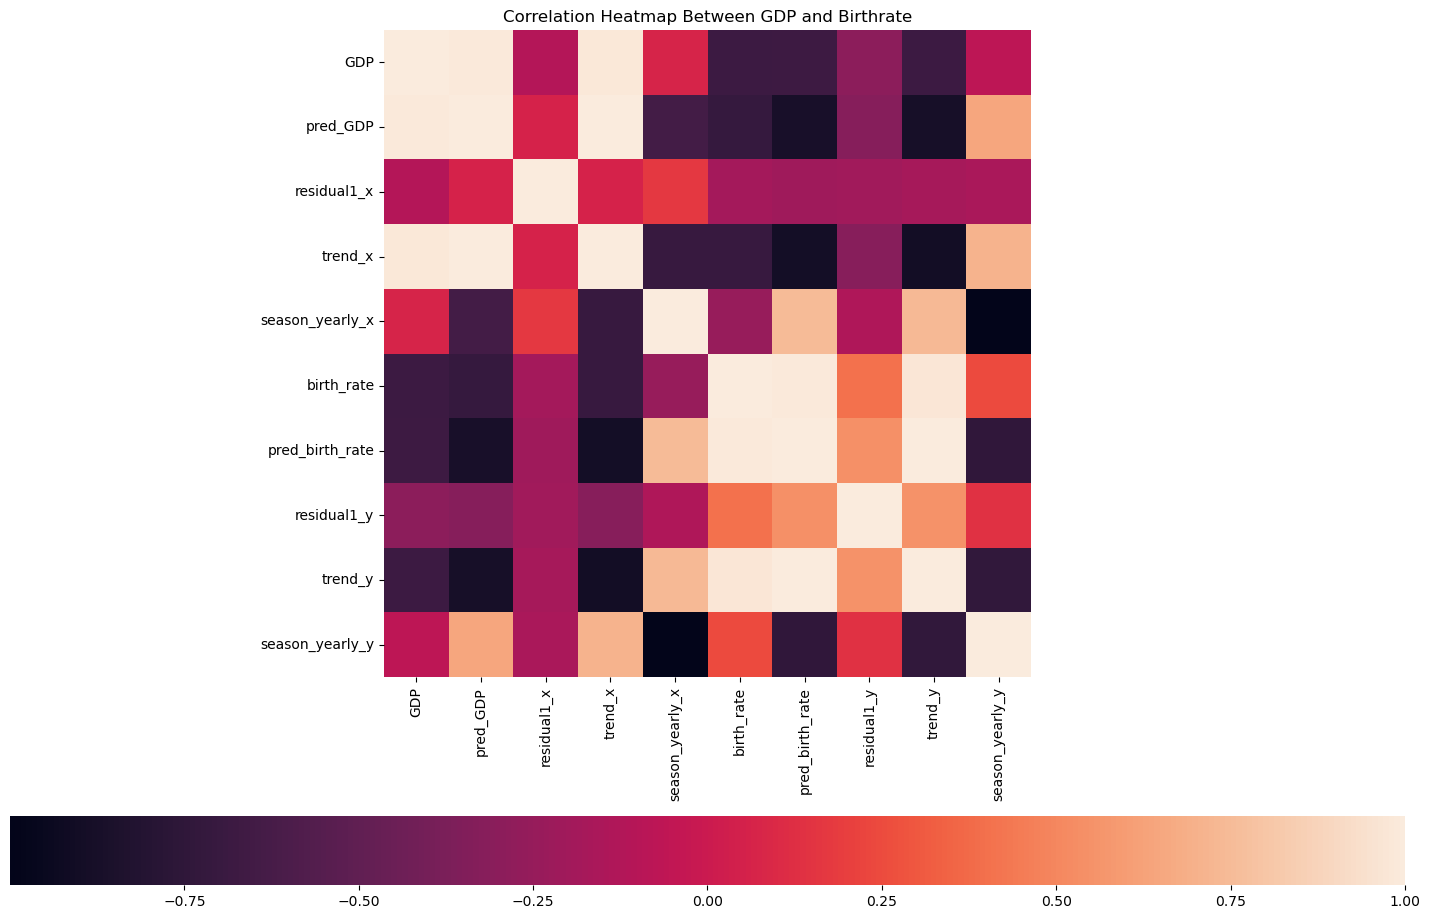

In [152]:
# Create a correlation heatmap, Figure 4.
fig, ax=plt.subplots(figsize=(18,12))

sns.heatmap(new_df.corr(), cbar_kws={'orientation':'horizontal'}, square=True)
plt.title("Correlation Heatmap Between GDP and Birthrate")

In [150]:
# The Ordinary Least Squares (OLS) Regression Analysis 

import pandas as pd
import numpy as np
import statsmodels.api as sm


X = new_df['pred_birth_rate']
y = new_df['pred_GDP']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pred_GDP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.08e-15
Time:                        19:53:37   Log-Likelihood:                -462.61
No. Observations:                  47   AIC:                             929.2
Df Residuals:                      45   BIC:                             932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.394e+04    703.105     

### This is an OLS regression result. It is a statistical method that estimates the relationship between one or more independent variables and a dependent variable. 

The table shows the coefficients of the model. The coefficient of pred_birth_rate is -8198.1477 which means that for every unit increase in pred_birth_rate, the predicted GDP will decrease by 8198.1477 units. The constant term is 3.394e+04 which is the value of predicted GDP when pred_birth_rate is zero 1.

The R-squared value of 0.757 indicates that 75.7% of the variation in the dependent variable (pred_GDP) can be explained by the independent variable (pred_birth_rate).

The F-statistic tests whether at least one of the independent variables has a non-zero coefficient. The p-value for this test is 2.08e-15 which is less than 0.05, indicating that at least one of the independent variables has a non-zero coefficient.

The Durbin-Watson statistic tests for autocorrelation in the residuals. A value close to 2 indicates no autocorrelation. In this case, the Durbin-Watson statistic is 0.134 which indicates strong positive autocorrelation.